In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
pizza = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/pizza.csv")
pizza

,Promote,Sales
0,23,554
1,56,1339
2,34,815
3,25,609
4,67,1600
5,82,2000
6,46,1000
7,14,300
8,6,150
9,47,1150


In [4]:
X = pizza[['Promote']]
y = pizza['Sales']

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
print(poly.get_feature_names_out())



['1' 'Promote' 'Promote^2']


In [5]:
lr = LinearRegression()
lr.fit(X_poly, y)

print("b0", lr.intercept_)
print("b1", lr.coef_)

b0 -18.27491741665085
b1 [ 0.00000000e+00  2.48006959e+01 -1.30947333e-02]


## Boston Dataset

In [6]:
boston = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/Boston.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
X = boston[['dis', 'lstat']]
y = boston['medv']

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
print(poly.get_feature_names_out())

['1' 'dis' 'lstat' 'dis^2' 'dis lstat' 'lstat^2' 'dis^3' 'dis^2 lstat'
 'dis lstat^2' 'lstat^3' 'dis^4' 'dis^3 lstat' 'dis^2 lstat^2'
 'dis lstat^3' 'lstat^4' 'dis^5' 'dis^4 lstat' 'dis^3 lstat^2'
 'dis^2 lstat^3' 'dis lstat^4' 'lstat^5']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 23)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("mean_squared_error:",mean_squared_error(y_test, y_pred))

mean_squared_error: 52.790146208918465


## using kFold

In [9]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
lr = LinearRegression()
degrees = [1,2,3,4,5]
scores = []
for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    results = cross_val_score(lr, X_poly, y, cv=kfold, scoring='neg_mean_squared_error')
    scores.append(results.mean())
i_max = np.argmax(scores)
print("Best Degree: ", degrees[i_max])
print("Best Scores: ", scores[i_max])

Best Degree:  4
Best Scores:  -23.551904255138943


crosss_val_score is used for evaluating the model's performance by performing cross validation using kfolds.

GridSearchCV is used for hyperparameter tuning, which involves finding the optimal values for hyperparameter of ML model.

## All variables in Boston Dataset

In [10]:
X = boston.drop(['medv'], axis = 1)
y = boston['medv']

kfold = KFold(n_splits = 5, shuffle=True, random_state=23)

In [26]:
lr = LinearRegression()
degrees = [1,2,3,4,5]
scores = []
for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    results = cross_val_score(lr, X_poly, y, cv=kfold, scoring='neg_mean_squared_error')
    scores.append(results.mean())
i_max = np.argmax(scores)
lr.fit(X_poly, y)
y_pred = lr.predict(X_poly)
residuals = y - y_pred

print("Best degree", degrees[i_max])
print("Best scores", scores[i_max])

Best degree 2
Best scores -17.010692384807435


## Residual Plot

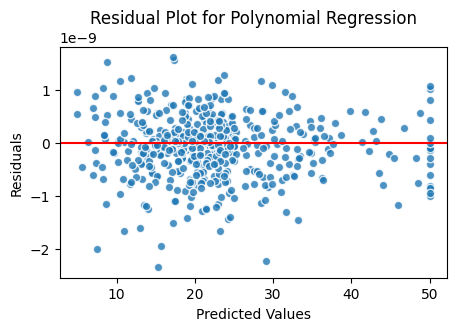

In [32]:
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals, alpha=0.8, edgecolors='w')
plt.axhline(y=0, color='r')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Regression')
plt.show()